# <p style="text-align:center; color:blue;"> Machine Learning - Web Develpoment Using Flask : Graded Project 3</p>

## Domain : <font color="#338CFF">Finance and Banking</font>

### Context :

Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan.
Company wants to automate the loan eligibility process based on customer
detail provided while filling the details online.
They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
others for checking the eligibility for the home loan.

### Project Objective :

1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

### Dataset Description :

Dataset can be found __[here](https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset)__.

1. Loan ID Unique Loan ID
2. Gender Male or Female
3. Married Applicant married (Y/N)
4. Dependents Number of dependents
5. Self employed Self employed (Y/N)
6. Education Graduate/Undergraduate
7. Applicant Income Applicant income (in dollars)
8. Co Applicant Income Co Applicant Income (in dollars)
9. Loan Amount Loan amount in thousands (in dollars)
10. Loan Amount Term Term of loan in months
11. Credit History Credit history meets guidelines Yes/No(1/0)
12. Property area Urban/Semi Urban/Rural
13. Loan Status (Target) Loan Approved (Y/N)

# <font color=#338CFF>● Model Building and saving the model using Pickle</font>

### 1. Import required libraries and read the dataset.

In [1]:
## Importing required libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve, roc_curve, auc, plot_precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
## Loading dataset
df = pd.read_csv("loan_approval_data.csv")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. 

In [3]:
## Checking the first 5 rows from the dataset
df.head(15)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y
6,lp001013,male,yes,0.0,not graduate,no,2333,1516.0,95.0,360.0,1.0,urban,y
7,lp001014,male,yes,3.0,graduate,no,3036,2504.0,158.0,360.0,0.0,semiurban,n
8,lp001018,male,yes,2.0,graduate,no,4006,1526.0,168.0,360.0,1.0,urban,y
9,lp001020,male,yes,1.0,graduate,no,12841,10968.0,349.0,360.0,1.0,semiurban,n


In [4]:
## Checking the shape of the dataset
df.shape

(614, 13)

In [5]:
## Gaining the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
## Checkiing the size of data
df.size

7982

In [7]:
## Checkining the dimension of dataframe
df.ndim

2

In [8]:
## Checking the dimension of series in the dataframe
df["gender"].ndim

1

In [9]:
## Checking the statistical summary of the dataset
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
## Checking the statistical summary of dataset -- for object type
df.describe(include = 'O')

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


In [11]:
## Checking the Percentage of null values in a specific column of the dataset
df.isnull().sum()/len(df) * 100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [12]:
check_duplicate = len(df[df.duplicated()])
if check_duplicate > 0:
   
    df = df.drop_duplicates()

    print(f"\033[1m{check_duplicate} duplicate record(s) found and dropped.\033[0m")
else:
    print("\033[1mNo duplicate records found.\033[0m")

No duplicate records found.


In [13]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,loan_id[object],1. lp0010022. lp0023283. lp0023054. lp0023085. lp0023146. lp0023157. lp0023178. lp0023189. lp00231910. lp00233211. other,1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)604 (98.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,gender[object],1. male2. female3. nan,489 (79.6%)112 (18.2%)13 (2.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3dQWrbYBSF0adgQjORMAYvRovoYrsI7cYYa1CHTNRB09J0rvsMPmeWkX7IZwsF33jYtq0g4aX7ADyPoarequq1+yBEfGzbdu+6+OF0On0fx/HYdQBy1nW9DsPwoyu4wziOx3me79M0vXccgIzb7fZtWZbj5XJ5raqe2Kqqpml6P5/PPzsOQNRb58U9IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5lD1+7NO3QdhX4/wOz6s63pdluVYzZ91Yn/rul6r6qPr+jYIz6V1gzCY8pHS8c7W+uqiT3xd1b3woU90XfUICx/6dKyrPPU+KX/UJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZMdF31CAsf+sTXVd0LH/rYIBBjXUWMBwRi/r+NusWxmy9TPjM79vTyZ8o3z/P9Mzr/ioFd/J3yff5sZsduPCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI8YXpRHz75TPzI5d2SAQY8pHzC9vKZbrtGqnCwAAAABJRU5ErkJggg=="">",13(2.1%)
3,married[object],1. yes2. no3. nan,398 (64.8%)213 (34.7%)3 (0.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bwW2DQBhE4cFCVnJZhJAohiJcbIqgG4TYg235Qg446YBZ+P2+CtbyEwaLqdZ1FeBwKX0AfI5K0reka+mD4N9rXddH6UPsoe667pZSaksfBJuc81xV1U/E4OqUUjsMw6Npmmfpw3y6ZVm+xnFsp2m6SooXmyQ1TfPs+/5e+jCQtN3WhMQDAmyIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthgU0vbe1SlD4L430Odc57HcWwV+D2qM8k5z5Jepc+xBzYIxxN2g1Ax5YNL5Ctb2CvEWYVdV0VeKZ1VyHVV9JXSWUVeV/F0fTD8qQsbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22IRcV0X7PFGEXVdFXimdFRsE2LCugg0PCLD5+xkVPznYW9113U2SmL1hb5eUUvvejUZ8SMCBcM8GG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTb1e/ImMXvDztggwIYpH2x+ARDSg2zURiOQAAAAAElFTkSuQmCC"">",3(0.5%)
4,dependents[float64],1. 0.02. 1.03. 2.04. 3.05. nan,345 (56.2%)102 (16.6%)101 (16.4%)51 (8.3%)15 (2.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACPUlEQVR4nO3bwWnjUBiF0V+DCMlGwhhcjIuYYqcIdWOMtZiEbJRFCExwNhajKyOfU8HDfEjIvNtM01SQ8GvtA/A4xEaM2Ihpquqlqp7WPshGvU/T9Lr2Ie5Fu9/vf3ddt1v7IFs0juO5aZo/gvvUdl23Ox6Pr33fv619mC25XC7PwzDsTqfTU1WJraraqqq+798Oh8PftQ+zQS9rH+Ce+EAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLaqs/

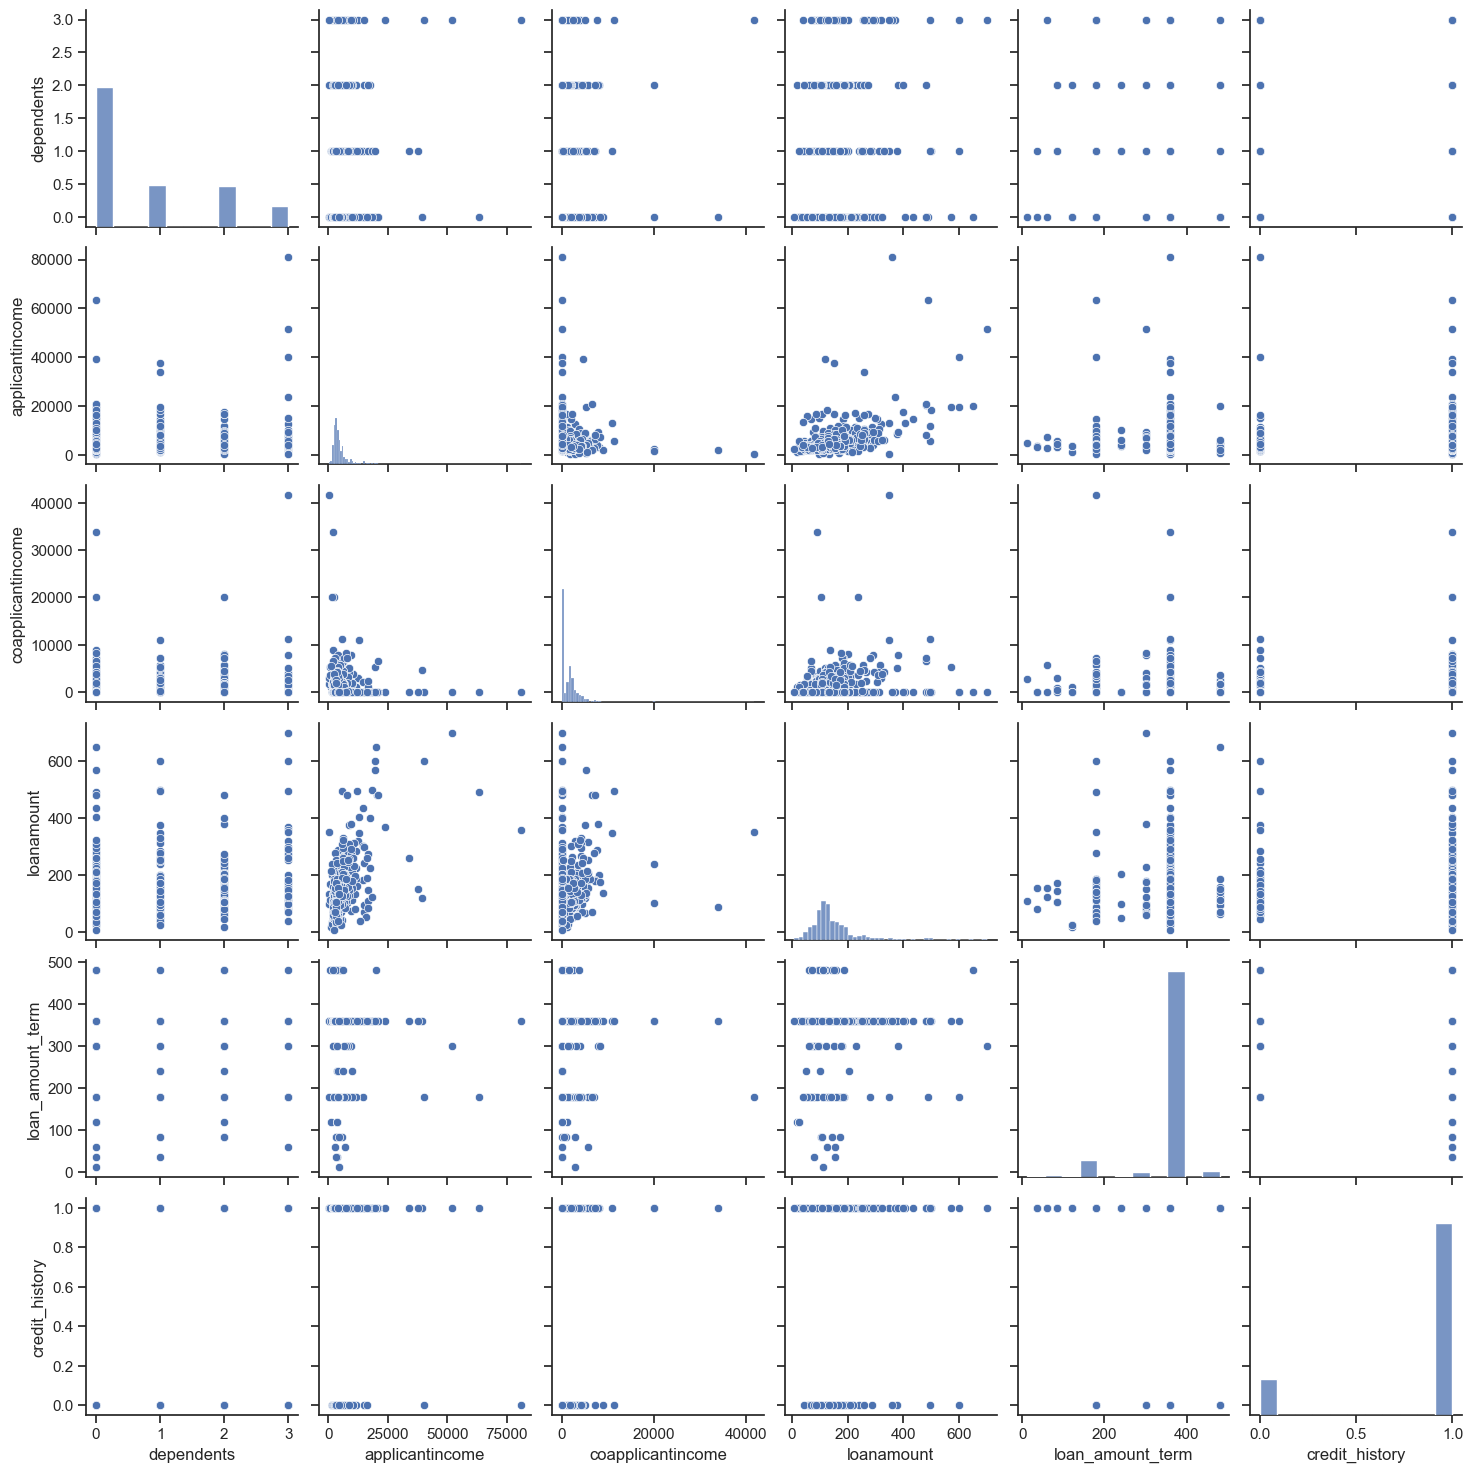

In [14]:
sns.pairplot(df)

### Inferences :

- We have 614 entries and 13 columns in the dataset consisting of integer, float and object type of data.
- Entire size of data is: (614 x 13) = 7982.
- We have a 2 dimensional dataset (columns and rows); The entries of the column are 1 dimensional data.
- We can see that, there are some null entries also in some columns.
- There are no duplicate records in given dataset.

### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [15]:
## Checking the Percentage of null values in a specific column of the dataset
df.isnull().sum()/len(df) * 100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [16]:
# Filling missing values with appropriate methods
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].median(), inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace=True)
df['credit_history'].fillna(df['credit_history'].mean(), inplace=True)

In [ ]:
# from sklearn.impute import SimpleImputer

# # Identify columns with missing values
# columns_with_missing = ['gender', 'married', 'dependents', 'self_employed', 'loanamount', 'loan_amount_term', 'credit_history']

# # Create an instance of the imputer
# imputer = SimpleImputer(strategy='most_frequent')

# # Fill missing values with appropriate methods
# df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

# # Drop redundant features
# redundant_features = ['loan_id']
# df = df.drop(redundant_features, axis=1)

# # Verify if there are any missing values remaining
# missing_values = df.isnull().sum()

# print(missing_values)

In [17]:
# Verify if there are any missing values remaining
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [18]:
# Drop redundant features (if identified)
df = df.drop('loan_id', axis=1)

In [19]:
df['applicantincome']=df['applicantincome']+df['coapplicantincome']
df.drop(['coapplicantincome'], axis=1, inplace=True)

In [20]:
df['loanamount'] = round(df['loanamount']*1000, 1)

In [ ]:
# df['loanamount'] = df['loanamount'].apply(lambda x: round(x * 1000, 1))

In [21]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849.0,146412.2,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,6091.0,128000.0,360.0,1.0,rural,n


### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [22]:
print(df.columns)

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')


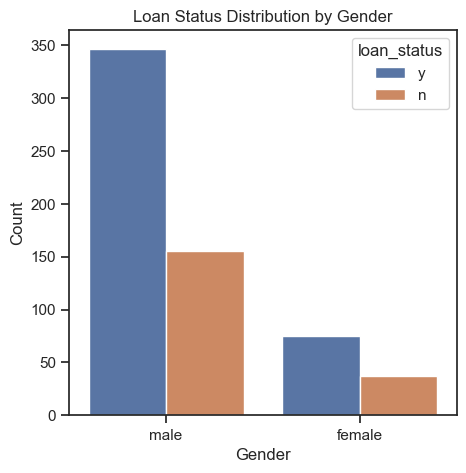

In [23]:
# Plot loan_status distribution with respect to gender
plt.figure(figsize=(5, 5))
sns.countplot(x='gender', hue='loan_status', data=df)
plt.title("Loan Status Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Figure size 500x500 with 0 Axes>

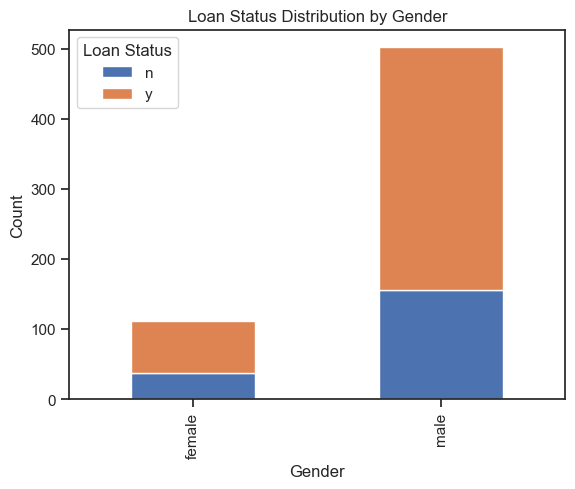

In [24]:
# Plot loan_status distribution with respect to gender using a stacked bar plot
plt.figure(figsize=(5, 5))
gender_loan_status = df.groupby(['gender', 'loan_status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title("Loan Status Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Loan Status')
plt.show()

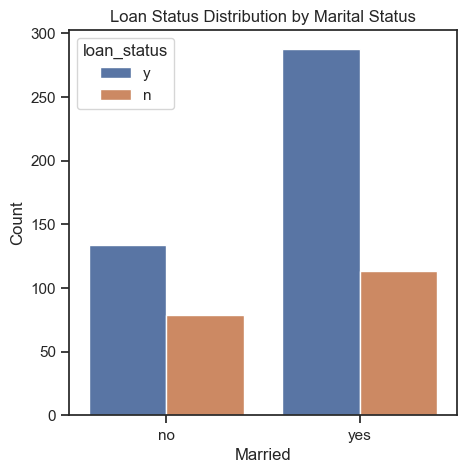

In [25]:
# Plot loan_status distribution with respect to married status
plt.figure(figsize=(5, 5))
sns.countplot(x='married', hue='loan_status', data=df)
plt.title("Loan Status Distribution by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()

<Figure size 800x800 with 0 Axes>

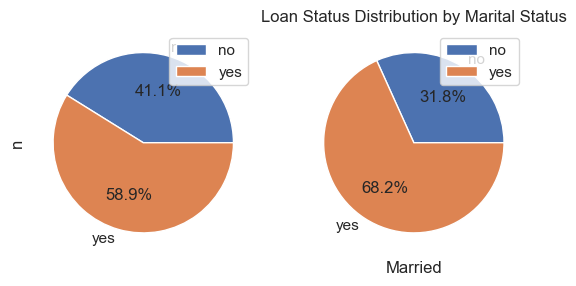

In [26]:
# Plot loan_status distribution with respect to married status using a pie chart
plt.figure(figsize=(8, 8))
df.groupby(['married', 'loan_status']).size().unstack().plot(kind='pie', autopct='%1.1f%%', subplots=True)
plt.title("Loan Status Distribution by Marital Status")
plt.xlabel("Married")
plt.ylabel("")
plt.legend(loc="upper right")
plt.show()


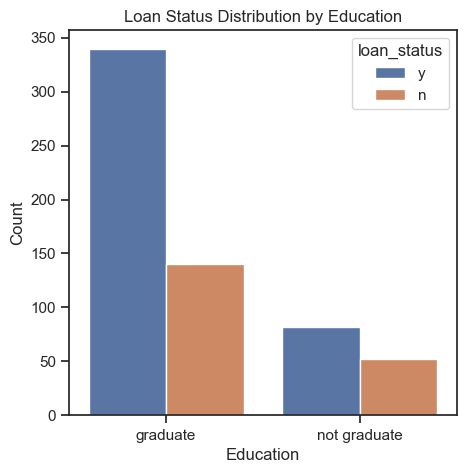

In [27]:
# Plot loan_status distribution with respect to education
plt.figure(figsize=(5, 5))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Loan Status Distribution by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

<Figure size 500x500 with 0 Axes>

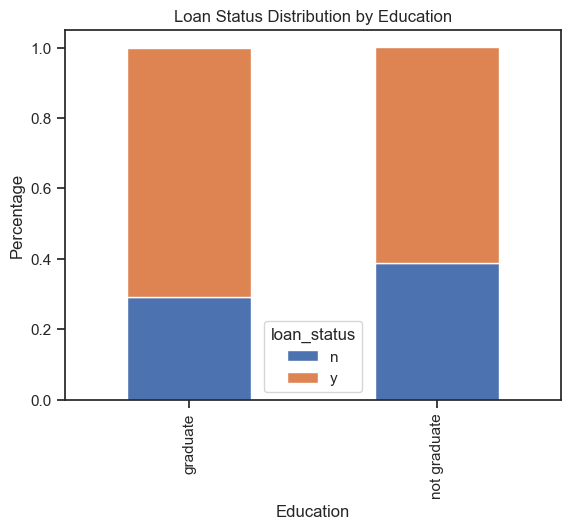

In [28]:
# Plot loan_status distribution with respect to education using a stacked percentage bar plot
plt.figure(figsize=(5, 5))
edu_loan_status = df.groupby(['education', 'loan_status']).size().unstack()
edu_loan_status.div(edu_loan_status.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title("Loan Status Distribution by Education")
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()


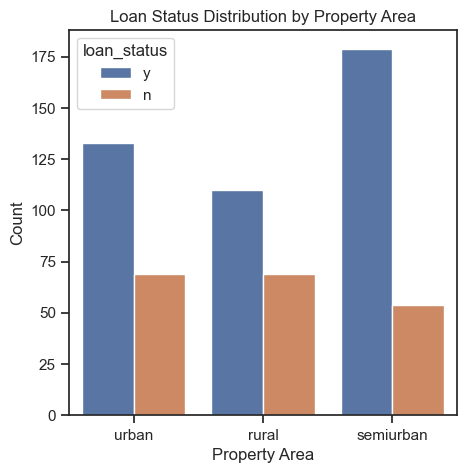

In [29]:
# Plot loan_status distribution with respect to property area
plt.figure(figsize=(5, 5))
sns.countplot(x='property_area', hue='loan_status', data=df)
plt.title("Loan Status Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

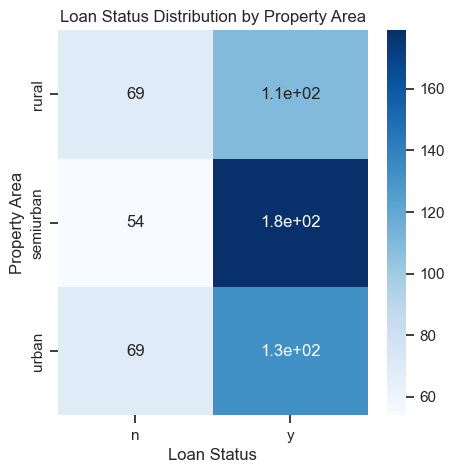

In [30]:
# Plot loan_status distribution with respect to property area using a heatmap
plt.figure(figsize=(5, 5))
prop_loan_status = df.groupby(['property_area', 'loan_status']).size().unstack()
sns.heatmap(prop_loan_status, annot=True, cmap='Blues')
plt.title("Loan Status Distribution by Property Area")
plt.xlabel("Loan Status")
plt.ylabel("Property Area")
plt.show()


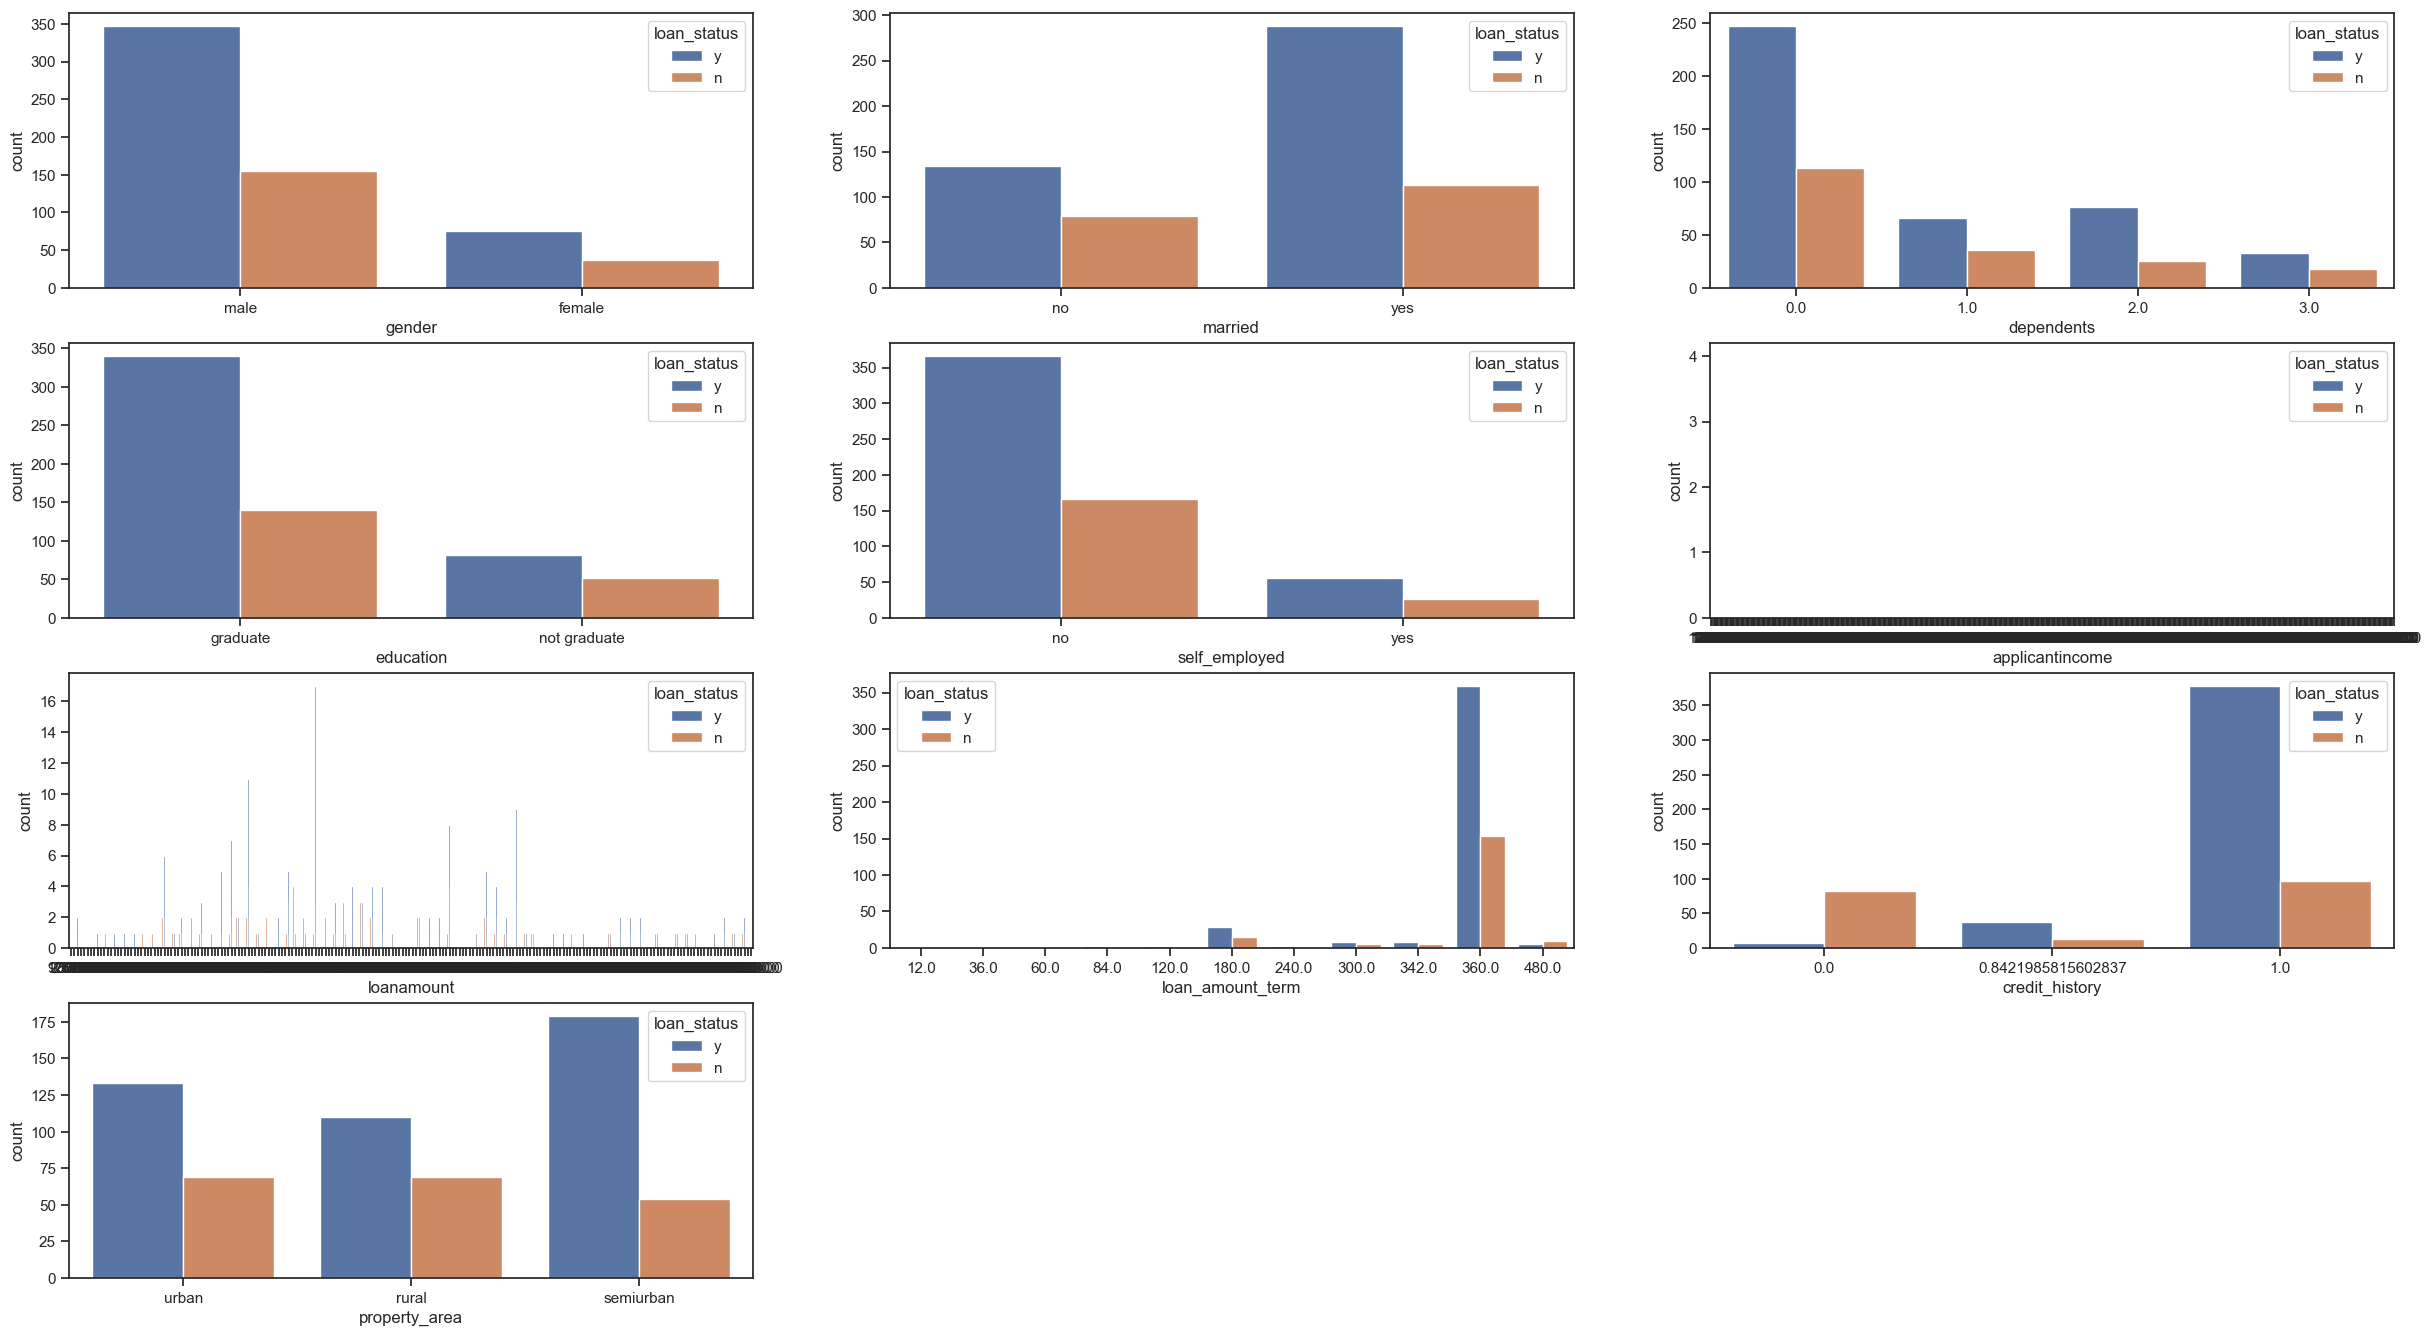

In [31]:
categorical_features=['gender','married','dependents','education','self_employed','applicantincome',
                     'loanamount','loan_amount_term','credit_history','property_area']
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

### <font color=#338CFF>Inferences :</font>

- **Loan Status Distribution by Gender :** It can be observed that there is a higher number of loan approvals among male applicants compared to female applicants. This suggests a disparity in loan approval rates based on gender, with a greater number of loans being approved for male applicants in the dataset.

- **Loan Status Distribution by Marital Status:** Among the applicants, the rate of loan approvals is higher for those who are married compared to those who are not married. This indicates that marital status is an influential factor in the loan approval decision.

- **Loan Status Distribution by Education:** Among the applicants, it is observed that a higher number of loans are approved for graduated applicants compared to those who are non-graduated. However, the rate of non-approval is relatively higher for non-graduated applicants. This suggests that graduation may play a significant role in the loan approval decision, with a higher likelihood of loan approval for individuals who have completed their education.

- **Loan Status Distribution by Property Area:** It can be inferred that the semi-urban area is the most favorable property area in terms of loan approvals, followed by urban and rural areas. The loan approval and non-approval ratio being greater in the semi-urban area further strengthens this observation.

### 5. Encode the categorical data.

In [32]:
## Checking the categorical columns which are present.
df.select_dtypes('object').columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

In [33]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [34]:
df['married'].unique()

array(['no', 'yes'], dtype=object)

In [35]:
df['education'].unique()

array(['graduate', 'not graduate'], dtype=object)

In [36]:
df['self_employed'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [38]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
# ## Manual Encoding :
# df['gender'] = df['gender'].replace({'male':0, 'female':1})

# df['married'] = df['married'].replace({'no':0, 'yes':1})

# df['education'] = df['education'].replace({'graduate':0, 'not graduate':1})

# df['self_employed'] = df['self_employed'].replace({'no':0, 'yes':1})

# df['property_area'] = df['property_area'].replace({'urban':0, 'rural':1, 'semiurban':2})

# df['loan_status'] = df['loan_status'].replace({'y':0, 'n':1})

In [39]:
## Performimg label encoding
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [40]:
df['gender'].unique()

array([1, 0])

In [41]:
df['married'].unique()

array([0, 1])

In [42]:
df['education'].unique()

array([0, 1])

In [43]:
df['self_employed'].unique()

array([0, 1])

In [44]:
df['property_area'].unique()

array([2, 0, 1])

In [45]:
df['loan_status'].unique()

array([1, 0])

In [46]:
## Final dataframe
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849.0,146412.2,360.0,1.0,2,1
1,1,1,1.0,0,0,6091.0,128000.0,360.0,1.0,0,0


<Axes: >

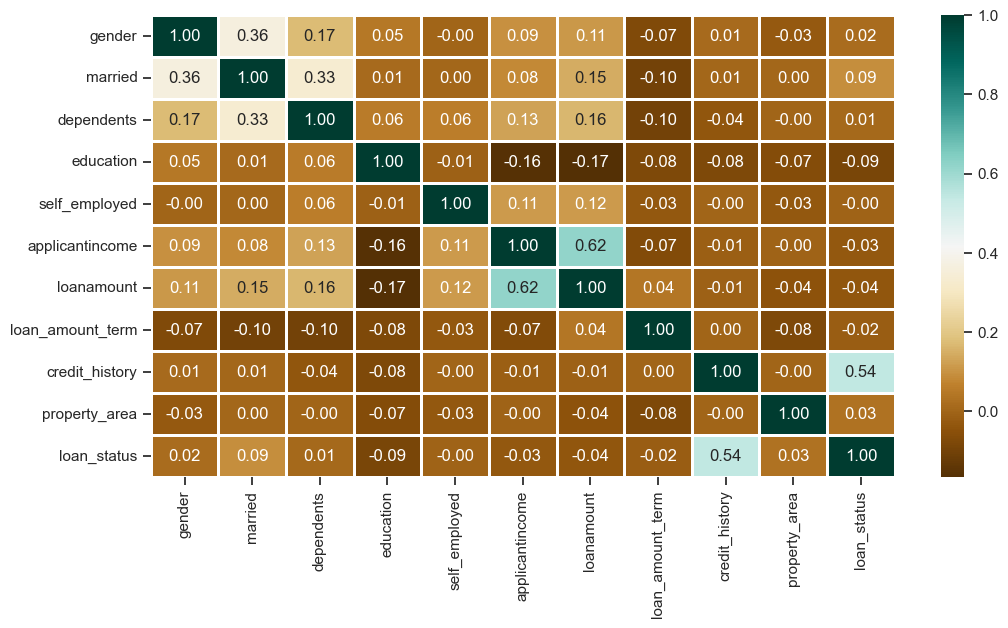

In [47]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG', fmt='.2f',
            linewidths=2, annot=True)

### 6. Separate the target and independent features and split the data into train and test.

In [48]:
## Lets store the target column in the y variable and the rest of the columns in the X variable.
target = df['loan_status']
features = df.drop('loan_status', axis=1)

In [ ]:
# Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

In [49]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849.0,146412.2,360.0,1.0,2,1
1,1,1,1.0,0,0,6091.0,128000.0,360.0,1.0,0,0


In [ ]:
# # Create an instance of StandardScaler
# ss = StandardScaler()

# # Define the column indices to standardize
# columns_to_standardize = [5, 6, 7]

# # Standardize the selected columns in the training set
# X_train.iloc[:, columns_to_standardize] = ss.fit_transform(X_train.iloc[:, columns_to_standardize])

# # Standardize the selected columns in the test set
# X_test.iloc[:, columns_to_standardize] = ss.transform(X_test.iloc[:, columns_to_standardize])

In [68]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print("\033[1mX_train head :\033[0m","\n", X_train[:2])
print("\n")
print("\033[1mX_test head :\033[0m","\n", X_test[:2])

(368, 10) (246, 10)
(368,) (246,)
X_train head : 
      gender  married  dependents  education  self_employed  applicantincome  \
569       1        1         0.0          0              0           5230.0   
571       1        1         0.0          0              0           6567.0   

     loanamount  loan_amount_term  credit_history  property_area  
569    104000.0             360.0             0.0              2  
571    165000.0             360.0             0.0              2  


X_test head : 
      gender  married  dependents  education  self_employed  applicantincome  \
533       1        0         1.0          0              0          11250.0   
544       0        1         0.0          1              0           3680.0   

     loanamount  loan_amount_term  credit_history  property_area  
533    196000.0             360.0        0.842199              1  
544    102000.0             360.0        0.842199              1  


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [69]:
# take the model, and data as inputs
def fit_n_predict(model, X_train, X_test, y_train, y_test):
    
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test data
    pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    # Calculate the precision score
    precision = precision_score(y_test, pred)
    
    # Calculate the recall score
    recall = recall_score(y_test, pred)
    
    # Calculate the F1 score
    f1 = f1_score(y_test, pred)
    
    # Calculate the average precision score (AUPRC)
    auprc = average_precision_score(y_test, pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    
    # return all the metrics
    return accuracy, precision, recall, f1, auprc, cm


In [70]:
# Intializing the models
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lr = LogisticRegression()

In [71]:
from sklearn import metrics
for clf in (rf, knn, svc,  lr):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print("\033[1mAccuracy score of \033[0m",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train, 
                                         y_pred))

Accuracy score of  RandomForestClassifier = 97.28260869565217
Accuracy score of  KNeighborsClassifier = 79.8913043478261
Accuracy score of  SVC = 69.83695652173914
Accuracy score of  LogisticRegression = 69.83695652173914


In [72]:
# making predictions on the testing set
for clf in (rf, knn, svc, lr):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\033[1mAccuracy score of \033[0m",
        clf.__class__.__name__,"=",
        100*metrics.accuracy_score(y_test,
                                    y_pred))


Accuracy score of  RandomForestClassifier = 74.79674796747967
Accuracy score of  KNeighborsClassifier = 61.382113821138205
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 67.07317073170732


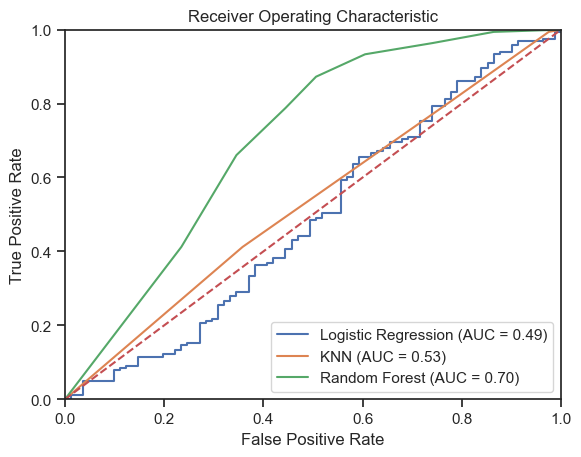

In [55]:
# Plot ROC curve for each model
plt.figure()
for model, model_name in zip([lr, knn, rf, svc],
                             ['Logistic Regression', 'KNN',
                              'Random Forest','SVC']):
    if model_name != 'Naive Bayes':
        if hasattr(model, 'predict_proba'):
            pred_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=model_name + ' (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

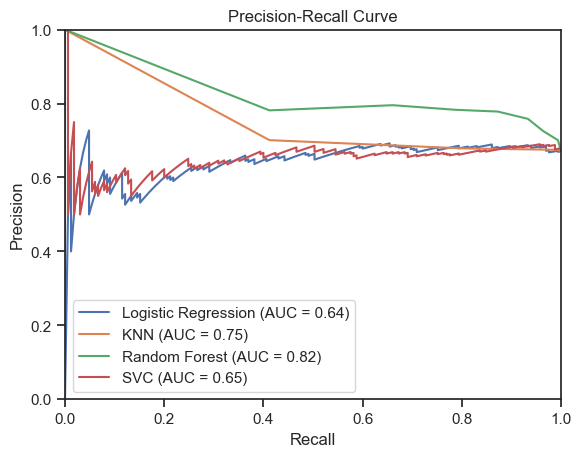

In [57]:
# Plot precision-recall curve for each model
plt.figure()
for model, model_name in zip([lr, knn, rf, svc],
                             ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']):
    if model_name != 'Naive Bayes':
        if hasattr(model, 'predict_proba'):
            pred_prob = model.predict_proba(X_test)[:, 1]
            precision, recall, thresholds = precision_recall_curve(y_test, pred_prob)
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, label=model_name + ' (AUC = %0.2f)' % pr_auc)
        else:
            decision_scores = model.decision_function(X_test)
            precision, recall, thresholds = precision_recall_curve(y_test, decision_scores)
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, label=model_name + ' (AUC = %0.2f)' % pr_auc)

plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("\033[1mCross-Validation Scores :\033[0m", cv_scores)
print("\033[1mMean CV Score :\033[0m", cv_scores.mean())

Cross-Validation Scores : [0.7972973  0.74324324 0.85135135 0.82191781 0.78082192]
Mean CV Score : 0.7989263235838578


In [59]:
# Perform grid search for parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\033[1mBest Parameters :\033[0m", grid_search.best_params_)
print("\033[1mBest Score :\033[0m", grid_search.best_score_)

Best Parameters : {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score : 0.8286930766382822


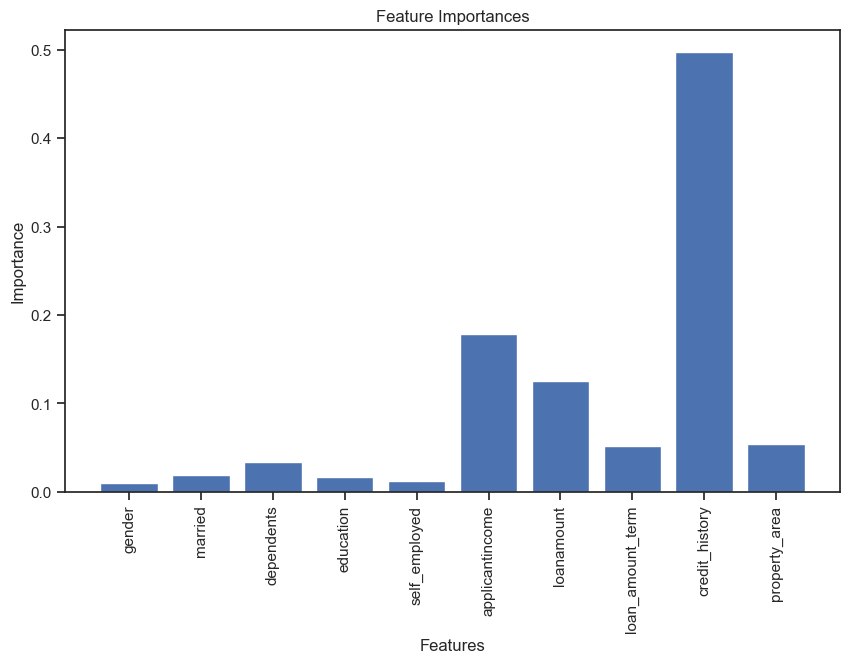

In [60]:
# Plot feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_names = df.drop('loan_status', axis=1).columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [61]:
# Evaluate the model on the testing set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the evaluation metrics
print("\033[1mAccuracy :\033[0m", accuracy)
print("\033[1mPrecision :\033[0m", precision)
print("\033[1mRecall :\033[0m", recall)
print("\033[1mF1 Score :\033[0m", f1)

Accuracy : 0.7804878048780488
Precision : 0.7655502392344498
Recall : 0.9696969696969697
F1 Score : 0.8556149732620321


<style color = blue>### Conclusion : </style>

### <font color="#338CFF">Conclusion :</font>

__Random Forest Classifier is giving the best accuracy with an accuracy score of 97.28 % for the given dataset.__

### Creating a pickle file with an extension as .pkl

In [62]:
import pickle

## Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

## Thank You..